In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import cross_val_score


In [59]:
df = pd.read_csv('data3/Project_merge.csv', low_memory=False)

In [60]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['name', 'release_date', 'developers', 'publishers', 'categories',
       'genres', 'publisherClass'],
      dtype='object')


In [61]:
cols_to_encode = ['developers', 'publishers']
# Dictionary to store LabelEncoders
encoders = {}

for col in cols_to_encode:
    # Initialize encoder
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    encoders[col] = le
    

In [62]:
numeric_df = df.select_dtypes(include=['number']).copy()
print(numeric_df.head(10))

   appid  price   positive   negative   peak_ccu  pct_pos_total  \
0     20   4.99     7500.0     1121.0       46.0           86.0   
1    240   9.99   172801.0     6697.0    14426.0           96.0   
2    300   9.99    20604.0     1878.0      285.0           90.0   
3    360   9.99     3492.0     1195.0       55.0           73.0   
4    440   0.00  1025633.0   120619.0    50817.0           89.0   
5    570   0.00  1998462.0   451338.0   555977.0           81.0   
6    730   0.00  7480813.0  1135108.0  1212356.0           86.0   
7   1500   9.99      855.0      214.0        4.0           78.0   
8   1610   1.99      225.0       39.0       19.0           86.0   
9   2280   9.99    22813.0      870.0      234.0           96.0   

   num_reviews_total   copiesSold  reviewScore  developers_encoded  \
0             6482.0     378635.0         87.0               46087   
1           124438.0   15468468.0         96.0               46087   
2            15155.0    1172320.0         92.0      

In [66]:
df['genres'] = df['genres'].str.replace('[', '', regex=False).str.replace(']', '', regex=False)
genre = df['genres'].str.get_dummies(sep=',')
df['categories'] = df['categories'].str.replace('[', '', regex=False).str.replace(']', '', regex=False)
categories = df['categories'].str.get_dummies(sep=',')
publisher = pd.get_dummies(df['publisherClass'], prefix='publisher').astype(int)


numeric_df_final = pd.concat([numeric_df, genre, categories, publisher], axis=1)
print(numeric_df_final.shape)

(84536, 120)


In [ ]:
print(numeric_df_final.head(5))

In [102]:
X = numeric_df_final.drop(columns=['appid', 'copiesSold']).copy()
y = numeric_df_final['copiesSold'].copy()

In [103]:
correlations = X.corrwith(y).abs().sort_values(ascending=False)
X = X[correlations.index]
X.head()

,num_reviews_total,positive,negative,peak_ccu,'Valve Anti-Cheat enabled',publisher_AAA,'Remote Play on Tablet','Steam Timeline','Remote Play on Phone','In-App Purchases','SteamVR Collectibles','Steam Workshop',publisher_AA,'Steam Trading Cards','Remote Play on TV','Multi-player','Online Co-op','Single-player','Co-op','Cross-Platform Multiplayer','Online PvP',publisher_Hobbyist,'Free To Play',pct_pos_total,'HDR available','Family Sharing','PvP','Massively Multiplayer','Multi-player','Includes level editor','MMO','Stats','Includes Source SDK','Indie','LAN Co-op','Action',price,'Steam Cloud',reviewScore,'LAN PvP','Full controller support','Steam Achievements','Captions available','Casual','Commentary available','Adventure','VR Supported','Casual','Adventure','Partial Controller Support','VR Only',publisher_Indie,'Early Access','Indie','Remote Play Together','RPG','Steam Turn Notifications','VR Support','Tracked Controller Support','RPG','Massively Multiplayer','Shared/Split Screen Co-op','Strategy','Shared/Split Screen','Sports','Action','Violent','Simulation','Gore',publishers_encoded,'Racing',developers_encoded,'Simulation','Racing','Sexual Content','Steam Leaderboards','Sports','Steam Achievements','Family Sharing','Violent','Nudity','Strategy','Nudity','Game Development','Gore','Shared/Split Screen PvP','Education','Movie','Early Access','Utilities','Tracked Controller Support','Design & Illustration','Audio Production','Animation & Modeling','Software Training','Education','Video Production','Accounting','Full controller support','Stats','Animation & Modeling','Photo Editing','Steam Cloud','PvP','Steam Trading Cards','Free To Play','Design & Illustration','360 Video','Documentary','Episodic','Short','Tutorial','Shared/Split Screen','VR Only','Co-op','MMO','Partial Controller Support','Web Publishing'
0,6482.0,7500.0,1121.0,46.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,86.0,0,1,1,0,0,0,0,0,0,0,0,1,4.99,0,87.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40478,0,46087,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,124438.0,172801.0,6697.0,14426.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,96.0,0,1,0,0,0,0,0,1,1,0,0,1,9.99,1,96.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40478,0,46087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15155.0,20604.0,1878.0,285.0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,90.0,0,1,0,0,0,0,0,1,1,0,0,1,9.99,0,92.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40478,0,46087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3822.0,3492.0,1195.0,55.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,73.0,0,1,0,0,0,0,0,0,0,0,0,1,9.99,0,75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40478,0,46087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1146642.0,1025633.0,120619.0,50817.0,1,1,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,1,89.0,0,0,0,0,0,1,0,1,0,0,0,1,0.00,0,90.0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40478,0,46087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [105]:
# RandomForest with all data
rf = RandomForestRegressor(n_estimators=100, max_depth=250, random_state=12)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=250, random_state=12)

In [106]:
mse = mean_absolute_error(y_test, rf.predict(X_test))
print('MSE: ', mse)

r2 = r2_score(y_test, rf.predict(X_test))
print('R-squared:' , r2)

MSE:  44185.009309763744
R-squared: 0.604494164741435


In [109]:
#np.set_printoptions(threshold=1000)
pd.set_option('display.max_columns', None)
feature_importance1 = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance1.sort_values(ascending=False, inplace=True)
print(feature_importance1)

num_reviews_total                4.589941e-01
positive                         1.872289e-01
peak_ccu                         1.679767e-01
negative                         1.012882e-01
 'Free To Play'                  1.782245e-02
 'Racing'                        1.488536e-02
price                            1.248969e-02
 'Casual'                        5.165727e-03
reviewScore                      2.857578e-03
publishers_encoded               2.737688e-03
developers_encoded               2.565732e-03
publisher_Hobbyist               2.099098e-03
 'Multi-player'                  2.081818e-03
pct_pos_total                    1.764901e-03
 'Stats'                         1.741634e-03
 'Remote Play on Tablet'         1.503618e-03
publisher_AA                     9.909092e-04
 'Simulation'                    9.709996e-04
 'Steam Workshop'                8.375215e-04
 'HDR available'                 7.956031e-04
 'Online Co-op'                  6.726235e-04
 'Steam Trading Cards'           6

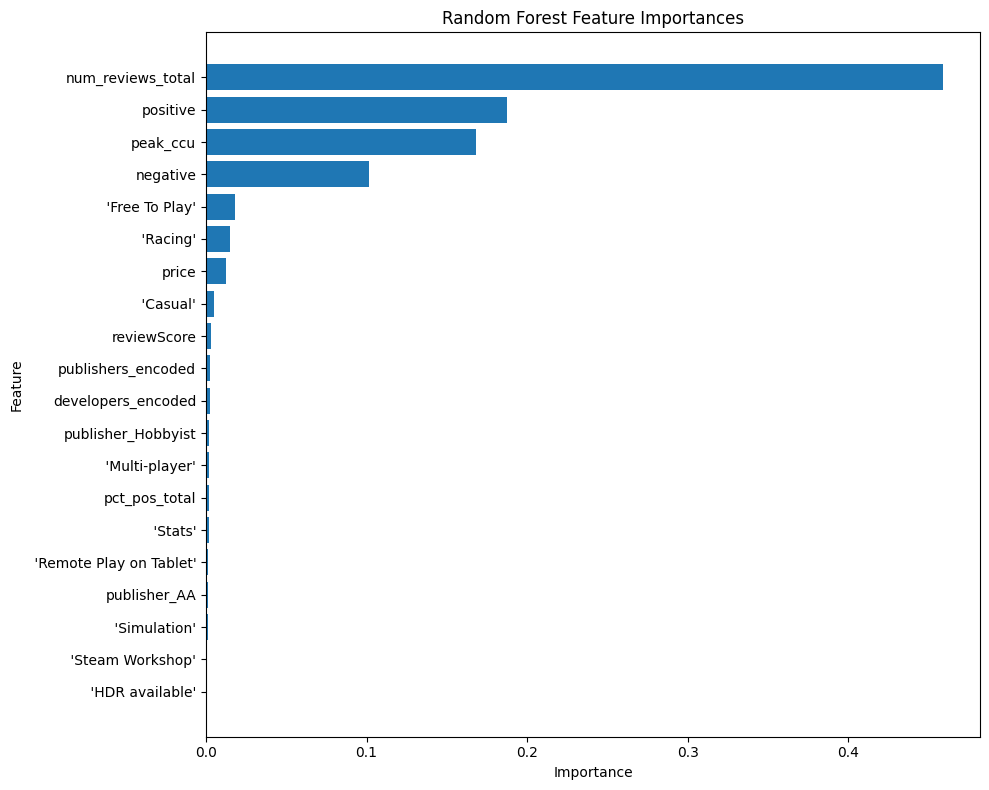

In [110]:
top20 = feature_importance1.head(20)

f_df = top20.reset_index()
f_df.columns = ['feature', 'importance']

plt.figure(figsize=(10, 8))
plt.barh(f_df['feature'], f_df['importance'])
plt.gca().invert_yaxis()  
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

In [113]:

X = numeric_df_final.drop(columns=['appid', 'copiesSold', 'num_reviews_total']).copy()
y = numeric_df_final['copiesSold'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [114]:
rf2 = RandomForestRegressor(n_estimators=200, max_depth=200)
rf2.fit(X_train, y_train)

predicted2 = rf2.predict(X_test)
mse_2 = mean_absolute_error(y_test, predicted2)
print('MSE: ', mse_2)

r2_2 = r2_score(y_test, predicted2)
print('R-squared:' , r2_2)

MSE:  39317.12059875329
R-squared: 0.7536103965592422


In [115]:
#np.set_printoptions(threshold=1000)
pd.set_option('display.max_columns', None)
feature_importance2 = pd.Series(rf2.feature_importances_, index=X.columns)
feature_importance2.sort_values(ascending=False, inplace=True)

print(feature_importance2)

positive                         5.329930e-01
negative                         1.998441e-01
peak_ccu                         1.264469e-01
price                            1.936489e-02
 'Co-op'                         1.915842e-02
 'Free To Play'                  1.757160e-02
developers_encoded               8.210586e-03
 'Commentary available'          7.682225e-03
 'Online Co-op'                  7.614797e-03
reviewScore                      6.258502e-03
pct_pos_total                    6.004388e-03
publishers_encoded               5.717070e-03
 'Stats'                         4.603509e-03
 'Steam Trading Cards'           3.037416e-03
 'Valve Anti-Cheat enabled'      2.718783e-03
 'PvP'                           2.435071e-03
 'Adventure'                     2.379952e-03
 'Steam Workshop'                1.926416e-03
 'Full controller support'       1.759588e-03
 'In-App Purchases'              1.649985e-03
 'Casual'                        1.510051e-03
 'Massively Multiplayer'         1

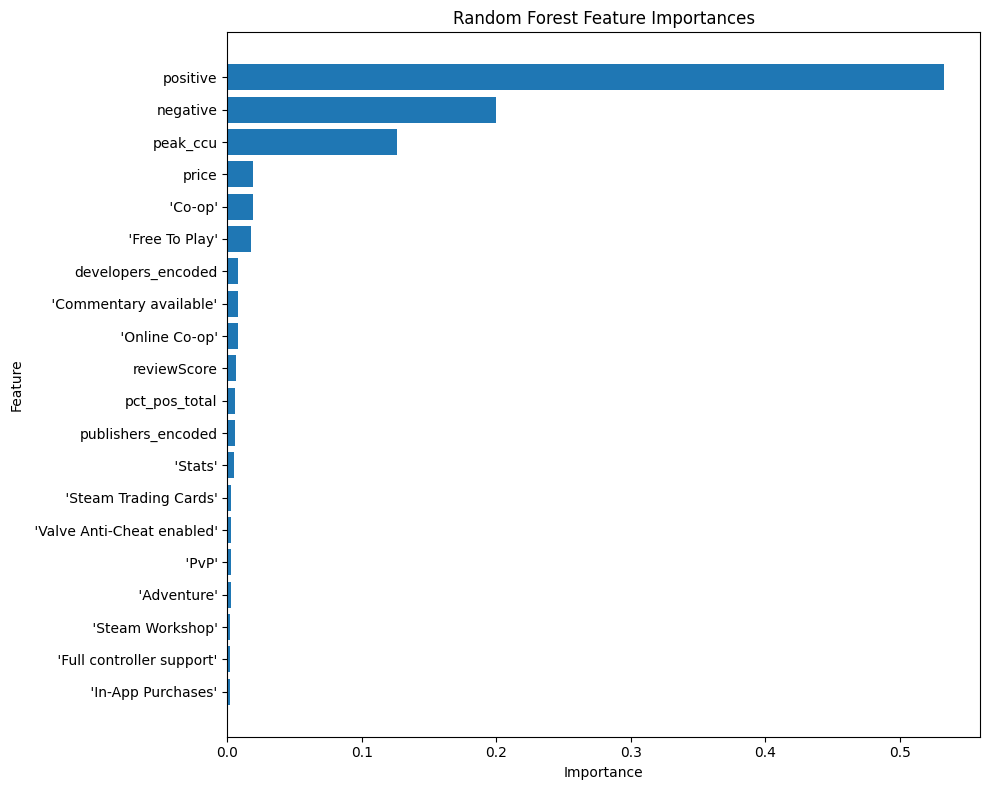

In [116]:
top20 = feature_importance2.head(20)

f_df2 = top20.reset_index()
f_df2.columns = ['feature', 'importance']

plt.figure(figsize=(10, 8))
plt.barh(f_df2['feature'], f_df2['importance'])
plt.gca().invert_yaxis()   # highest importance at top
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

In [87]:
X = numeric_df_final.drop(columns=['appid', 'copiesSold', 'num_reviews_total', 'positive', 'negative', 'peak_ccu', 'reviewScore', 'pct_pos_total']).copy()
y = numeric_df_final['copiesSold'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [88]:
rf3 = RandomForestRegressor(n_estimators=200, max_depth=200)
rf3.fit(X_train, y_train)

predicted3 = rf3.predict(X_test)
mse_3 = mean_absolute_error(y_test, predicted3)
print('MSE: ', mse_3)

r2_3 = r2_score(y_test, predicted3)
print('R-squared:' , r2_3)

MSE:  109932.8322104895
R-squared: 0.30903774486311575


In [ ]:
pd.set_option('display.max_columns', None)
feature_importances = pd.Series(rf3.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

print(feature_importances)


 'Remote Play on Phone'          8.326095e-02
 'Free To Play'                  6.542208e-02
publisher_AAA                    6.378868e-02
 'Remote Play on Tablet'         5.923413e-02
developers_encoded               5.321507e-02
 'Stats'                         5.318102e-02
publishers_encoded               4.916556e-02
 'Commentary available'          4.567646e-02
 'Valve Anti-Cheat enabled'      4.299818e-02
price                            3.822326e-02
 'Massively Multiplayer'         3.537902e-02
 'Online Co-op'                  2.793925e-02
 'Adventure'                     2.606929e-02
 'Steam Trading Cards'           2.376313e-02
 'In-App Purchases'              1.926582e-02
 'Co-op'                         1.917542e-02
 'LAN PvP'                       1.615510e-02
publisher_AA                     1.479160e-02
 'VR Supported'                  1.442738e-02
'Multi-player'                   1.412103e-02
 'Steam Achievements'            1.369615e-02
 'Partial Controller Support'    1